# Weatherpy

## Analysis
* As shown in the Max Temperature vs. Latitude Plot, one can clearly see that the temperature recorded in cities gradually reaches a peak as one travels from one pole of the planet to the other; in other words, the planet is warmer along its equator.
* Upon analysis of the Wind Speed and Cloudiness, it would seem that there is little to no correlation between Latitude and Wind Speed or Cloudiness. However, it would appear that towards the equator, there is more moisture in the air, as shown in the Humidity vs. Latitude Plot. When examining the plot, there is almost always a gap near the equatorial Latitude (0) on the scatter plot due to cities on, or near, the equator having high humidity.
* One issue with this method of analysis is that not all cities have data collected from the openweathermap api and as a result, one should have a buffer zone of approximately 100 for a sample size of 500. To resolve this, one could generate cities and call their data while simultaneously checking if the city exists in the database. From there a flag could be raised and an if-else construct could be used to filter out the cities that don't have data and replace them with one that does.

In [1]:
from citipy import citipy
import random
import matplotlib.pyplot as plt
import openweathermapy as ow
import pandas as pd
from configweather import api_key

## Generate Cities List
Something to keep in mind when doing this analysis was the distribution of land, and therefore cities, on the planet. For example, Earth is very "top-heavy" in the sense that "land areas are distributed predominantly in the Northern Hemisphere (68%) relative to the Southern Hemisphere (32%) as divided by the equator" (http://phl.upr.edu/library/notes/distributionoflandmassesofthepaleo-earth). A similar behavior is exhibited when comparing the Eastern and Western Hemispheres as well, with the East having nearly double that of the West. This can create a skewed analysis due to the fact that a majority of cities would be expected to be in the hemispheres with the greatest amount of land. I've combatted this bias by implementing a simple "if-elseif" construct to sample the 4 quadrants of the world for cities.

To avoid duplicate cities, I've implemented an if-statement which checks if the newly generated city is already in the cities list, if so it won't append the duplicate to the list.

In [2]:
cities = []
samplesize = 700

def generate_cities(sample_size):
    i = 0
    while(i < samplesize):
        if i < (samplesize/4) :
            lat = (random.randint(-90,0)) + (random.randint(0,10)/10) + (random.randint(0,10)/100) 
            lon = (random.randint(-180,0)) + (random.randint(0,10)/10) + (random.randint(0,10)/100)
        elif i < (samplesize/2):
            lat = (random.randint(0,90)) + (random.randint(0,10)/10) + (random.randint(0,10)/100) 
            lon = (random.randint(-180,0)) + (random.randint(0,10)/10) + (random.randint(0,10)/100)
        elif i < (samplesize*(3/4)):
            lat = (random.randint(-90,0)) + (random.randint(0,10)/10) + (random.randint(0,10)/100) 
            lon = (random.randint(0,180)) + (random.randint(0,10)/10) + (random.randint(0,10)/100)
        else:
            lat = (random.randint(0,90)) + (random.randint(0,10)/10) + (random.randint(0,10)/100) 
            lon = (random.randint(0,180)) + (random.randint(0,10)/10) + (random.randint(0,10)/100)
        city = citipy.nearest_city(lat, lon)
        cityname = city.city_name
        if (not(cityname in cities)):
            cities.append(cityname)
            i = i + 1



generate_cities(samplesize)

## Perform API Calls

In [3]:
weather_data = []
counter = 1
settings = {"units": "metric", "appid": api_key}
print("Beginning Data Retrieval\n------------------------")
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
for city in cities:    
    print(f"Processing city {counter} of {samplesize} | {city}")
    cityjoined = "_".join(city.split())
    counter = counter + 1
    try:
        weather_data.append(ow.get_current(city, **settings))
        query_url = f"{url}appid={api_key}&q={cityjoined}&units={units}"
        print(query_url)
    except:
        print(f"Data for {city} not found.")
        
print("------------------------\nData Retrieval Complete\n------------------------")

Beginning Data Retrieval
------------------------
Processing city 1 of 700 | punta arenas
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=punta_arenas&units=metric
Processing city 2 of 700 | rikitea
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=rikitea&units=metric
Processing city 3 of 700 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=arraial_do_cabo&units=metric
Processing city 4 of 700 | georgetown
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=georgetown&units=metric
Processing city 5 of 700 | puerto ayora
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=puerto_ayora&units=metric
Processing city 6 of 700 | hermanus
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hermanus&units=metric
Processing city 7 of 700 | mataura
http://

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=iaciara&units=metric
Processing city 59 of 700 | la brea
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=la_brea&units=metric
Processing city 60 of 700 | ilheus
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ilheus&units=metric
Processing city 61 of 700 | mollendo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mollendo&units=metric
Processing city 62 of 700 | ilhabela
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ilhabela&units=metric
Processing city 63 of 700 | villarrica
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=villarrica&units=metric
Processing city 64 of 700 | san carlos de bariloche
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=san_carlos_de_bari

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=sao_felix_do_xingu&units=metric
Processing city 117 of 700 | filadelfia
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=filadelfia&units=metric
Processing city 118 of 700 | mapiri
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mapiri&units=metric
Processing city 119 of 700 | bom jesus
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=bom_jesus&units=metric
Processing city 120 of 700 | amarante do maranhao
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=amarante_do_maranhao&units=metric
Processing city 121 of 700 | salta
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=salta&units=metric
Processing city 122 of 700 | ipora
Data for ipora not found.
Processing city 123 of 700 | gilbues
http://api.openweather

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=cachoeira_do_sul&units=metric
Processing city 172 of 700 | reconquista
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=reconquista&units=metric
Processing city 173 of 700 | anori
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=anori&units=metric
Processing city 174 of 700 | halalo
Data for halalo not found.
Processing city 175 of 700 | lufilufi
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lufilufi&units=metric
Processing city 176 of 700 | norman wells
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=norman_wells&units=metric
Processing city 177 of 700 | illoqqortoormiut
Data for illoqqortoormiut not found.
Processing city 178 of 700 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=qaanaaq&uni

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=nome&units=metric
Processing city 229 of 700 | ilulissat
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ilulissat&units=metric
Processing city 230 of 700 | socorro
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=socorro&units=metric
Processing city 231 of 700 | constanza
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=constanza&units=metric
Processing city 232 of 700 | lander
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lander&units=metric
Processing city 233 of 700 | saint-augustin
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=saint-augustin&units=metric
Processing city 234 of 700 | bethel
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=bethel&units=metric


http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=college&units=metric
Processing city 286 of 700 | choix
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=choix&units=metric
Processing city 287 of 700 | nantucket
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=nantucket&units=metric
Processing city 288 of 700 | angra
Data for angra not found.
Processing city 289 of 700 | bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=bathsheba&units=metric
Processing city 290 of 700 | wahran
Data for wahran not found.
Processing city 291 of 700 | santa fe
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=santa_fe&units=metric
Processing city 292 of 700 | mayo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=mayo&units=metric
Processing city 293 of 700 | san quin

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=marrakesh&units=metric
Processing city 344 of 700 | moose factory
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=moose_factory&units=metric
Processing city 345 of 700 | iralaya
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=iralaya&units=metric
Processing city 346 of 700 | restrepo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=restrepo&units=metric
Processing city 347 of 700 | havre-saint-pierre
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=havre-saint-pierre&units=metric
Processing city 348 of 700 | champerico
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=champerico&units=metric
Processing city 349 of 700 | brownsville
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015ac

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=kirakira&units=metric
Processing city 403 of 700 | khudumelapye
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=khudumelapye&units=metric
Processing city 404 of 700 | luwuk
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=luwuk&units=metric
Processing city 405 of 700 | esperance
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=esperance&units=metric
Processing city 406 of 700 | poso
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=poso&units=metric
Processing city 407 of 700 | banjar
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=banjar&units=metric
Processing city 408 of 700 | buala
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=buala&units=metric
Processing city 

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=northam&units=metric
Processing city 461 of 700 | bambanglipuro
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=bambanglipuro&units=metric
Processing city 462 of 700 | ulladulla
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=ulladulla&units=metric
Processing city 463 of 700 | karratha
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=karratha&units=metric
Processing city 464 of 700 | opuwo
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=opuwo&units=metric
Processing city 465 of 700 | lupiro
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lupiro&units=metric
Processing city 466 of 700 | kindu
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=kindu&units=metric
Process

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=kijang&units=metric
Processing city 518 of 700 | port victoria
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=port_victoria&units=metric
Processing city 519 of 700 | camabatela
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=camabatela&units=metric
Processing city 520 of 700 | waingapu
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=waingapu&units=metric
Processing city 521 of 700 | kasongo-lunda
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=kasongo-lunda&units=metric
Processing city 522 of 700 | umtata
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=umtata&units=metric
Processing city 523 of 700 | hambantota
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hamb

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=norwich&units=metric
Processing city 578 of 700 | dikson
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=dikson&units=metric
Processing city 579 of 700 | zholymbet
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=zholymbet&units=metric
Processing city 580 of 700 | bairiki
Data for bairiki not found.
Processing city 581 of 700 | kashi
Data for kashi not found.
Processing city 582 of 700 | hasaki
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=hasaki&units=metric
Processing city 583 of 700 | lorengau
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=lorengau&units=metric
Processing city 584 of 700 | tabas
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=tabas&units=metric
Processing city 585 of 700 | airai
ht

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=katsuura&units=metric
Processing city 637 of 700 | nizhneyansk
Data for nizhneyansk not found.
Processing city 638 of 700 | zhezkazgan
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=zhezkazgan&units=metric
Processing city 639 of 700 | andenes
Data for andenes not found.
Processing city 640 of 700 | dullewala
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=dullewala&units=metric
Processing city 641 of 700 | takestan
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=takestan&units=metric
Processing city 642 of 700 | okhotsk
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=okhotsk&units=metric
Processing city 643 of 700 | suez
http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=suez&units=metric
Processing city 

http://api.openweathermap.org/data/2.5/weather?appid=da015cf534cbe2d698015acc069c1e9e&q=voskresenskoye&units=metric
------------------------
Data Retrieval Complete
------------------------


In [4]:
summary = ["name", "clouds.all", "sys.country", "dt", "main.humidity", "coord.lat", "coord.lon", "main.temp_max", "wind.speed"]
data = [response(*summary) for response in weather_data]
column_names = ["City", "Cloudiness", "Country", "Date", "Humidity", "Latitude", "Longitude", "Max Temperature","Wind Speed"]
weather_data = pd.DataFrame(data, columns=column_names)
weather_data.to_csv("weather_data.csv", sep=',', encoding='utf-8', index = False)
weather_data.count()

City               635
Cloudiness         635
Country            635
Date               635
Humidity           635
Latitude           635
Longitude          635
Max Temperature    635
Wind Speed         635
dtype: int64

In [5]:
weather_data.head(10)

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Max Temperature,Wind Speed
0,Punta Arenas,40,CL,1527822000,75,-53.16,-70.91,6.00,7.20
1,Rikitea,8,PF,1527823870,100,-23.12,-134.97,24.53,0.86
2,Arraial do Cabo,0,BR,1527823870,96,-22.97,-42.02,21.28,7.46
3,Georgetown,75,GY,1527822000,94,6.80,-58.16,25.00,3.10
4,Puerto Ayora,0,EC,1527823871,100,-0.74,-90.35,22.83,4.96
5,Hermanus,92,ZA,1527823872,98,-34.42,19.24,12.03,7.71
6,Mataura,0,NZ,1527823872,73,-46.19,168.86,7.73,2.06
7,Lebu,80,ET,1527823873,97,8.96,38.73,8.98,1.26
8,Avarua,75,CK,1527822000,88,-21.21,-159.78,24.00,2.60
9,Chuy,92,UY,1527823873,98,-33.69,-53.46,15.68,9.11


# Max Temperature vs. Latitude Plot

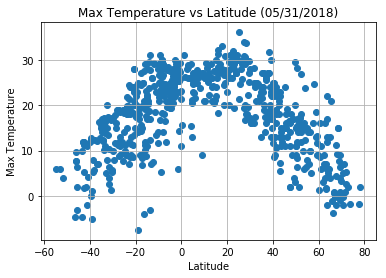

In [6]:
import datetime
date = datetime.datetime.fromtimestamp(int(weather_data["Date"][0])).strftime('%m/%d/%Y')

temps = weather_data["Max Temperature"]
lat = weather_data["Latitude"]
plt.scatter(x = lat, y = temps, marker="o")
plt.grid()
plt.title(f"Max Temperature vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")
plt.show()

# Humidity vs. Latitude Plot

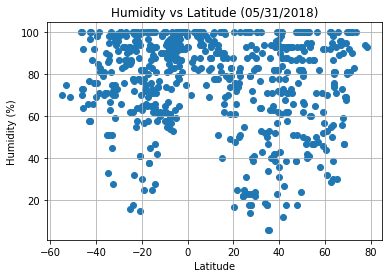

In [7]:
humid = weather_data["Humidity"]
plt.scatter(x = lat, y = humid, marker="o")
plt.grid()
plt.title(f"Humidity vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

# Cloudiness vs. Latitude Plot

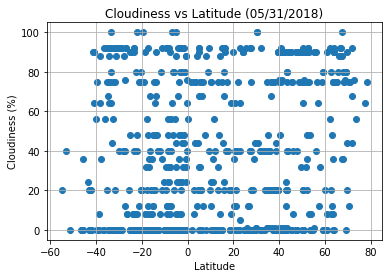

In [8]:
cloudy = weather_data["Cloudiness"]
plt.scatter(x = lat, y = cloudy, marker="o")
plt.grid()
plt.title(f"Cloudiness vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

# Wind Speed vs. Latitude Plot

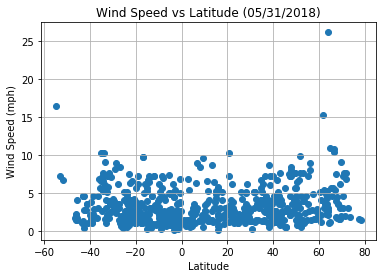

In [9]:
windspd = weather_data["Wind Speed"]
plt.scatter(x = lat, y = windspd, marker="o")
plt.grid()
plt.title(f"Wind Speed vs Latitude ({date})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()